Plots to reinforce discussion from correlation and linear regression results
============================================================

In [1]:
import matplotlib.pyplot as plt
import matplotlib

font = {"size": 15, "weight": "bold"}
matplotlib.rc("font", **font)


import numpy as np
import pandas as pd

In [2]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

In [3]:
color = matplotlib.cm.viridis(0.2)
color_c = matplotlib.cm.viridis(0.4)
color_sse = matplotlib.cm.viridis(0.3)

In [16]:
colors = [color, color_c, color_sse]

**Standard tournaments**

In [6]:
std = pd.read_csv('../data/standard_3_processed.csv', index_col=0)

//anaconda3/envs/axlml/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
winners = std[std['Normalized_Rank'] == 0]

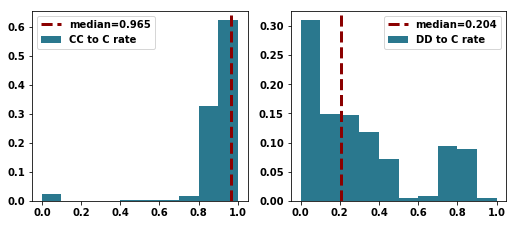

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.5))

for i, rate in enumerate(['CC_to_C_rate', 'DD_to_C_rate']):

    values = winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color_c, label=rate.replace('_', ' '))
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/rates_of_winners_in_standard_tournaments.pdf', bbox_inches='tight')

In [22]:
colors[2]

(0.206756, 0.371758, 0.553117, 1.0)

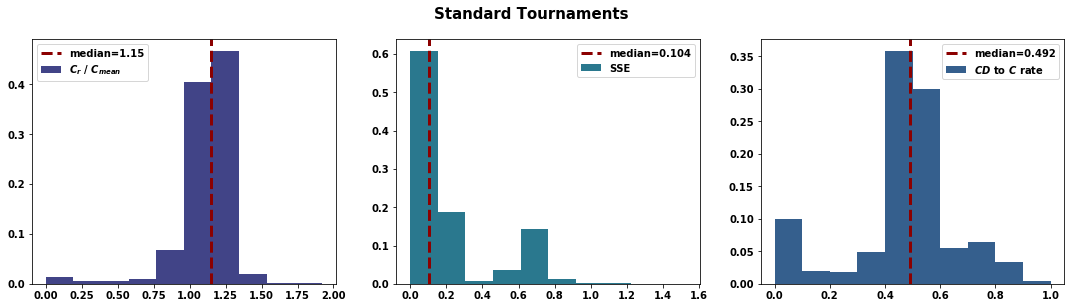

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.suptitle('Standard Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/standard_discussion.pdf', bbox_inches='tight')

**noisy tournaments**

In [35]:
noisy = pd.read_csv('../data/noise_3_processed.csv', index_col=0)

//anaconda3/envs/axlml/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [36]:
winners_noisy = noisy[noisy['Normalized_Rank'] == 0]

In [37]:
titles = ['Noisy tournament', 'Probabilistic ending tournament']

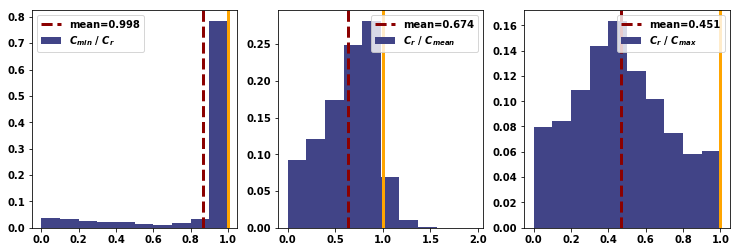

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_min', 'Cooperation_rating_comp_to_mean',
                          'Cooperation_rating_comp_to_max']):

    values = winners_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.mean(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="mean=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
# fig.savefig('../images/compared_to_mean_median_noisy.pdf', bbox_inches='tight')

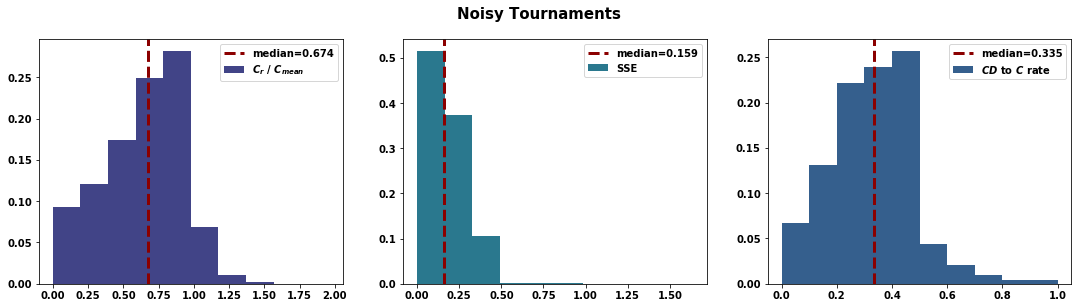

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Noisy Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/noisy_discussion.pdf', bbox_inches='tight')

**probend**

In [40]:
probend = pd.read_csv('../data/probend_3_processed.csv', index_col=0)

//anaconda3/envs/axlml/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [41]:
winners_probend = probend[probend['Normalized_Rank'] == 0]

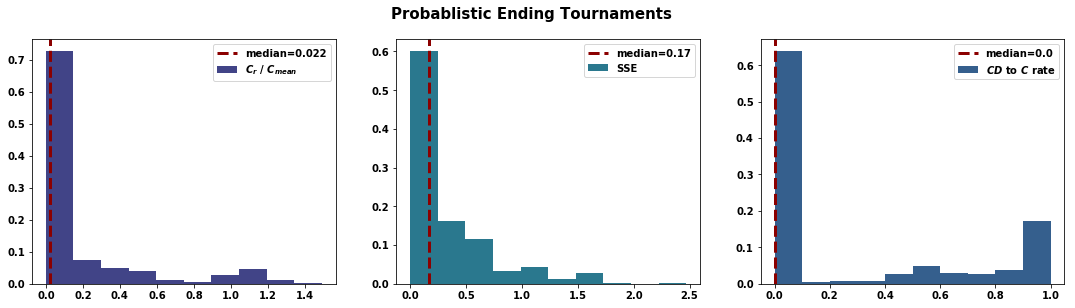

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_probend[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Probablistic Ending Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/probend_discussion.pdf', bbox_inches='tight')

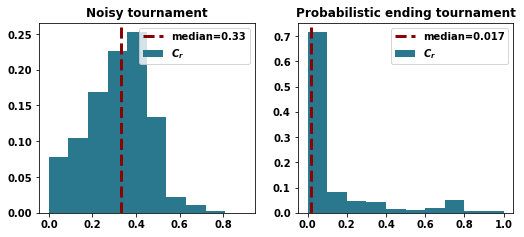

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.5))

for i, df in enumerate([winners_noisy, winners_probend]):

    values = df['Cooperation_rating']
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color_c, label=plot.features_labels['Cooperation_rating'])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    axes[i].set_title(titles[i], fontweight="bold")
    
fig.savefig('../images/c_r_winners_tournaments.pdf', bbox_inches='tight')

**noisy probabilistic ending**

In [43]:
probend_noisy = pd.read_csv('../data/probend_noise_3_processed.csv', index_col=0)

//anaconda3/envs/axlml/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [44]:
winners_probend_noisy = probend_noisy[probend_noisy['Normalized_Rank'] == 0]

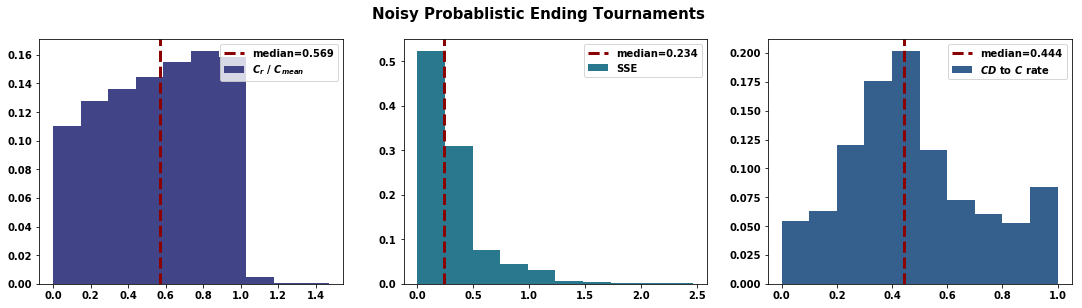

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = winners_probend_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.suptitle('Noisy Probablistic Ending Tournaments', fontsize=15, fontweight='bold') 
fig.savefig('../images/probend_noisy_discussion.pdf', bbox_inches='tight')

In [64]:
overall_winners = pd.concat([winners, winners_noisy, winners_probend, winners_probend_noisy])

//anaconda3/envs/axlml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


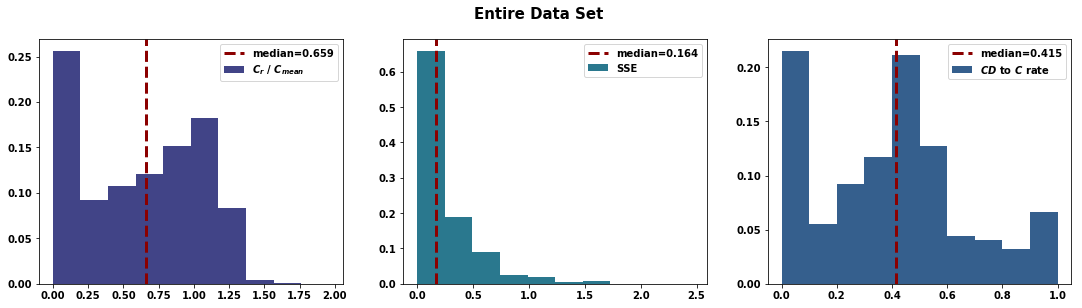

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18.5, 4.5))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'SSE',
                          'CD_to_C_rate']):

    values = overall_winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=colors[i], label=plot.features_labels[rate])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();

fig.suptitle('Entire Data Set', fontsize=15, fontweight='bold')
fig.savefig('../images/entire_data_discussion.pdf', bbox_inches='tight')